### Adam Brannigan 

## Numbers Dataset

We have a dataset of handwritten digits from 0 to 9

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [2]:
# Create a file list
f_list = glob.glob('data/*/*.png')
f_list.sort()

#create nunpy array from list
X = [np.array(Image.open(i)) for i in f_list]
X = np.array(X)


#create array of classes
#split each string in f_list
y = [np.array(i.split('\\')) for i in f_list]
#set y to index1 of list 
y = np.array([i[1] for i in y])


In [3]:
#check the shap of y
y.shape

(5000,)

In [4]:
#make y a 1d array
y = y.ravel()

In [5]:
#check the shap of X
X.shape


(5000, 20, 20)

In [6]:
# reshape to a 2d array
X = X.reshape(5000,20*20)


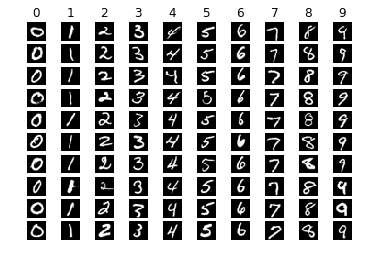

In [7]:
##Printing Examples
examples_per_class = 10
pos = 0
number_of_classes = 10
for cls in range(number_of_classes):
    idxs = range(pos,pos+500)
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(X[idx].reshape(20,20).astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(str(cls))
    pos = pos+500
plt.show()

## Partition into training sets and test sets
Set Training  set to 60%

In [8]:
# slit datat to training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.6)

# Naive Bayes  Model    (Gaussian)

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_predicted =gnb.predict(X_test)
print(accuracy_score (y_test,y_predicted))
print(gnb.score (X_test,y_test))



0.6353333333333333
0.6353333333333333


#### As you can see our Naive Bayes classifier Has under performedn with an accuracy score of only 69%  possible resons for such a low score are:
<li><b>1) The Naive baye algorithym Assumes all data features are independant 
<li><b> 2) In order for GuassianNB to be accurate the data must be normally distributed.

In [10]:
from sklearn.metrics import confusion_matrix
NB_Matrix = confusion_matrix(y_test, y_predicted)
print(NB_Matrix)

[[267   0   2   2   0   1   6   0  29   1]
 [  0 269   3   2   1   5   1   0   9   5]
 [  5  13 175  20   9   4  25   1  51   2]
 [  3  12  12 152   8   7   3   1  90  21]
 [  6   2   6   0  85  19   5   3  79  74]
 [ 13  11   4  14   7 102   6   1 124  16]
 [  3  11  10   0   0   7 262   0  11   0]
 [  4   6   1   2   6   1   0 128   7 142]
 [  0  35   7   3   7  15   2   0 197  37]
 [  2   2   1   0  13   1   0   6   8 269]]


In [11]:
#count wrong classifications
#NB_Matrix.sum()
diagonal = NB_Matrix.diagonal(0)
count_wrong = NB_Matrix.sum() - diagonal.sum()
print('Number of Missclassifications = ', + count_wrong)

Number of Missclassifications =  1094


In [12]:
# get incorrect classification
misclassified = np.where(y_test != y_predicted)
misclassified = np.array(misclassified)
#print(misclassified)


In [13]:
misclassified = misclassified.flatten()
misclassified.shape


(1094,)

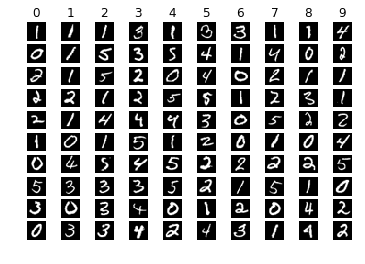

In [14]:
##Printing Examples
examples_per_class = 10
pos = 0
number_of_classes = 10
for cls in range(number_of_classes):
    #idxs = range(pos,pos+500)
    idxs = np.random.choice(misclassified, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(X[idx].reshape(20,20).astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(str(cls))
    pos = pos+500
plt.show()

#### As seen above we can observe that none of the miss classified images are greater than 5 this could mean one of two things.

<li><b>1) The numbers 6,7,8,9 are more distinctive when written by hand and more esily recognised
<li> <b>2) I made a booboo with my calculations and I have to re-check my work
   

# K-Nearest Neighbour Model


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier ( n_neighbors =5)
knn.fit(X_train,y_train)
ky_predicted = knn.predict(X_test)

knn.score(X_test,y_test)


0.9223333333333333

In [16]:
# get incorrect classification
misclassified_2 = np.where(y_test != ky_predicted)
misclassified_2 = np.array(misclassified)
#print(misclassified_2)

In [17]:
#misclassified_2.shape

In [18]:
# count of mis classifications
print('Number of Missclassifications = ', + misclassified_2.size)

Number of Missclassifications =  1094


In [19]:
KNN_Matrix = confusion_matrix(y_test,ky_predicted)
print(KNN_Matrix)

[[303   0   0   0   0   1   3   0   1   0]
 [  0 292   2   0   0   0   0   1   0   0]
 [  6  13 266   3   0   1   3   9   4   0]
 [  0   3   4 286   2   7   1   2   3   1]
 [  0  10   2   0 251   1   3   0   0  12]
 [  1   3   1  11   2 271   5   0   2   2]
 [  4   2   0   0   0   3 295   0   0   0]
 [  0   9   1   0   8   1   1 271   0   6]
 [  2   9   1  14   4  10   4   0 255   4]
 [  5   1   0   3   7   1   2   6   0 277]]


In [20]:
import pandas as pd
knn_diag = KNN_Matrix.diagonal()
false_pos = KNN_Matrix.sum(axis=0)- knn_diag
false_neg = KNN_Matrix.sum(axis=1)- knn_diag
#print(false_pos)
#print(false_neg)
falses = pd.DataFrame.from_dict({'False_Pos': false_pos, 'False_Neg': false_neg},orient='index',
                     columns=['0','1', '2', '3','4','5', '6', '7','8','9'])
print(falses)

            0   1   2   3   4   5   6   7   8   9
False_Pos  18  50  11  31  23  25  22  18  10  25
False_Neg   5   3  39  23  28  27   9  26  48  25


In [21]:
KNN_Matrix.diagonal()

array([303, 292, 266, 286, 251, 271, 295, 271, 255, 277], dtype=int64)

In [22]:
print(str(falses.iloc[[0]].idxmax(axis=1).values) 
      + ' Has the most False Posatives at '+ str(falses.iloc[[0]].max(axis=1).values))
print(str(falses.iloc[[1]].idxmax(axis=1).values) 
      + ' Has the most False Negatives at '+ str(falses.iloc[[1]].max(axis=1).values))



['1'] Has the most False Posatives at [50]
['8'] Has the most False Negatives at [48]


## K-fold Cross-Validation

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
fold = 1
n_folds=5


# enumerate splits
for train, test in KFold(n_folds, shuffle=True).split(X,y):
    #print('train: %s, test: %s' % (X[train], X[test]))
    knn = KNeighborsClassifier(n_neighbors=5)
    knn = knn.fit(X[train],y[train])
    #scores = cross_val_score(knn, X[train], y[train], scoring='accuracy')
    scores = knn.score(X[train], y[train])
    #k_scores.append(scores)
    k_scores = np.array(scores)
    print('Fold :', fold, 'Scored', scores)
    fold += 1

Fold : 1 Scored 0.9575
Fold : 2 Scored 0.9595
Fold : 3 Scored 0.96075
Fold : 4 Scored 0.96225
Fold : 5 Scored 0.9635


In [24]:
k_scores.mean()

0.9635

# Conclusion
In this case We would choose KNN model Over the GuassianNB as the scores were significanly better with GuassianNB at 64% when compared to KNN at 92% jumping to 96.3% when utilise k-fold cross validation . With such a gap in performance I could not see any real benafit in choosing GuassianNB in this particular instance. With that said the GuassianNB model could well outperform the KNN on a data set more suited to it IE. Normaly distributed with independant features.  